<a href="https://colab.research.google.com/github/Indiranafa/Machine-Learning/blob/main/QUIZ_1_Machine_Learning_2341720001_INDIRA_NAFA_AURAH_HUDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [ ]:
# Data
x = adult_income.data.features
y = adult_income.data.targets

df = pd.concat([x, y], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Data Size
df.shape

(48842, 15)

**Soal 1 - Data Loading, Imputation**

In [ ]:
# Soal  1
# Melakukan inspeksi profile data
# Variabel apa yang memiliki nilai yang hilang (missing value) dan berapa jumlahnya?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Variabel yang memiliki nilai yang hilang yaitu


*   workclass dengan jumlah 963
*   occupation dengan jumlah 966
*   native-country dengan jumlah 274





In [ ]:
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [ ]:
# Soal 2
# Lakukan data imputation pada fitur yang memiliki data yang hilang

df.fillna({
    'workclass': df['workclass'].mode()[0],
    'occupation': df['occupation'].mode()[0],
    'native-country': df['native-country'].mode()[0]
}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Cek apakah masih ada missing value
print("Missing value per kolom setelah imputasi:")
print(df.isnull().sum())

Missing value per kolom setelah imputasi:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
# Soal 3
# Inspeksi semua fitur kualitatif. Jika terdapat value yang tidak sesuai, ganti dengan 'Others' atau yang sesuai
# atau jika terdapat duplikasi karena kesalahan penulisan, lakukan penyesuaian.

# Inspect
print(df['workclass'].unique())
print(df['education'].unique())
print(df['marital-status'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['sex'].unique())
print(df['native-country'].unique())
print(df['income'].unique())

# Replace
df['workclass'] = df['workclass'].replace(['?', 'Without-pay', 'Never-worked'], 'Others')
df['occupation'] = df['occupation'].replace(['?', 'Armed-Forces'], 'Others')
df['occupation'] = df['occupation'].replace(['?'], 'Others-service')
df['native-country'] = df['native-country'].replace(['?'], 'Others')
df['income'] = df['income'].replace(['<=50K.', '>50K.'], ['<=50K', '>50K'])

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' 'Private']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'T

In [ ]:
# Cek
print(df['workclass'].unique())
print(df['education'].unique())
print(df['marital-status'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['sex'].unique())
print(df['native-country'].unique())
print(df['income'].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Others' 'Self-emp-inc']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Others'
 'Protective-serv' 'Priv-house-serv' 'Private']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' 'Others' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'T

**Soal 2 - Visual Inspection**

Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

5. Fenomena apa yang terjadi pada distribusi data 'age'?
    *   Data age cenderung berpusat pada usia produktif (20-50 tahun).
    *   Semakin bertambah usia, jumlah data makin sedikit.
    *   Distribusi tidak normal sempurna, cenderung skewed.
6. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
    *   Menggunakan imputasi median, karena median lebih robust terhadap outlier.
    *   Jika distribusi normal, mean juga bisa digunakan
7. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

    Jumlah outlier per kategori income: {'<=50K': 11706, '>50K': 781}
    Kategori dengan outlier terbanyak: <=50K

8. Cek korelasi antar seluruh variabel numerik. Pasangan variabel apa saja yang memiliki korelasi yang lemah (+- 0.5)

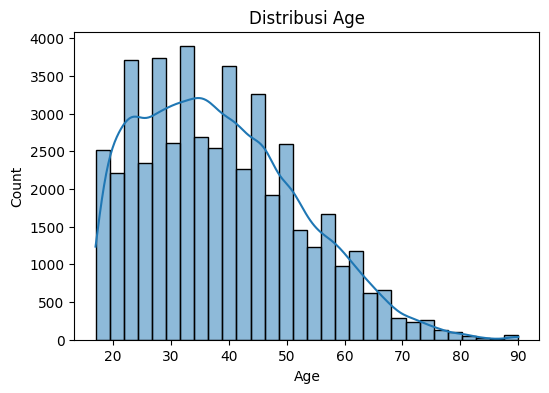

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram kolom 'age'
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribusi Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

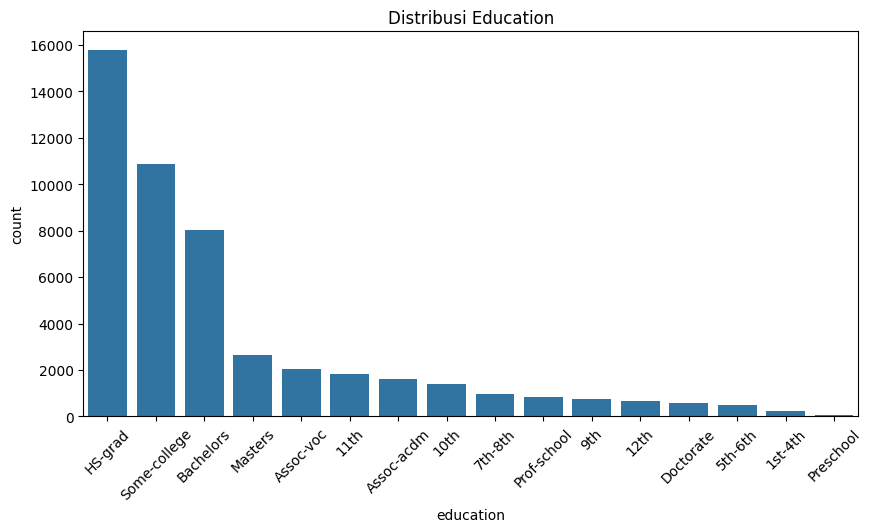

In [ ]:
# 2. Bar chart kolom 'education'
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title("Distribusi Education")
plt.xticks(rotation=45)
plt.show()

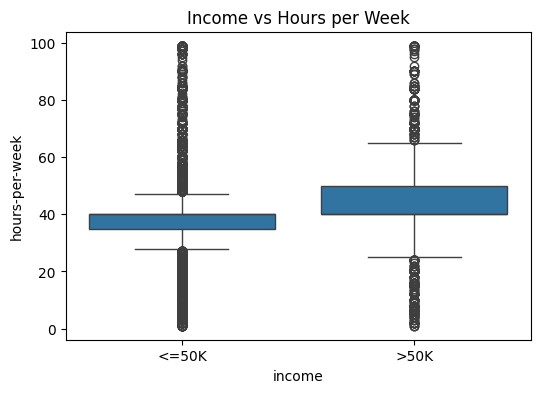

In [ ]:
# 3. Boxplot kolom 'income' terhadap 'hours-per-week'
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title("Income vs Hours per Week")
plt.show()

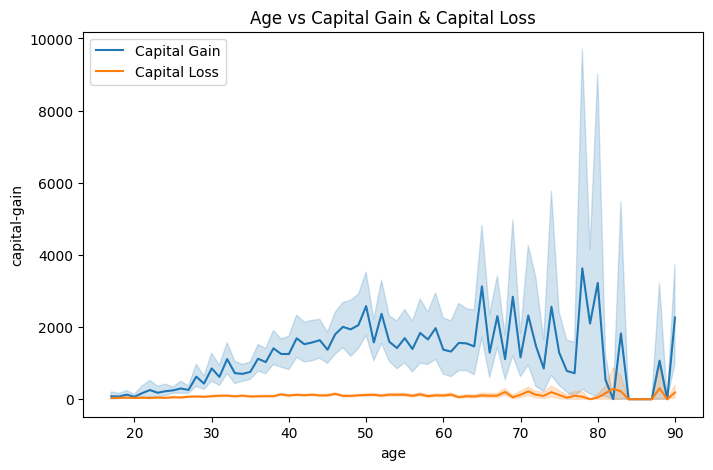

In [ ]:
# 4. Lineplot kolom 'age' terhadap 'capital-gain' dan 'capital-loss'
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='age', y='capital-gain', label="Capital Gain")
sns.lineplot(data=df, x='age', y='capital-loss', label="Capital Loss")
plt.title("Age vs Capital Gain & Capital Loss")
plt.legend()
plt.show()

In [ ]:
# 7. Jumlah outlier pada setiap kategori 'income' terkait 'hours-per-week'
outlier_counts = {}
for cat in df['income'].unique():
    data = df[df['income'] == cat]['hours-per-week']
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = data[(data < lower) | (data > upper)]
    outlier_counts[cat] = len(outliers)

print("\nJumlah outlier per kategori income:", outlier_counts)
print("Kategori dengan outlier terbanyak:", max(outlier_counts, key=outlier_counts.get))


Jumlah outlier per kategori income: {'<=50K': 11706, '>50K': 781}
Kategori dengan outlier terbanyak: <=50K


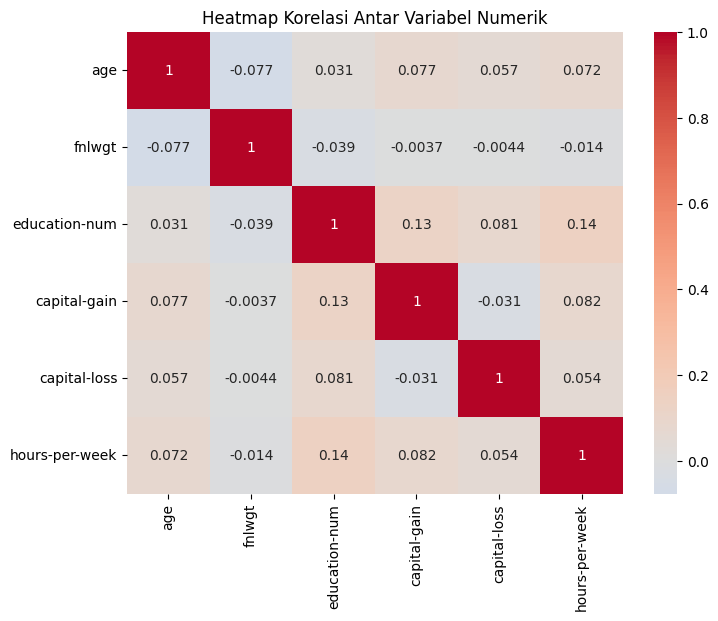


Pasangan variabel dengan korelasi lemah (<0.5):
('age', 'fnlwgt', np.float64(-0.08))
('age', 'education-num', np.float64(0.03))
('age', 'capital-gain', np.float64(0.08))
('age', 'capital-loss', np.float64(0.06))
('age', 'hours-per-week', np.float64(0.07))
('fnlwgt', 'age', np.float64(-0.08))
('fnlwgt', 'education-num', np.float64(-0.04))
('fnlwgt', 'capital-gain', np.float64(-0.0))
('fnlwgt', 'capital-loss', np.float64(-0.0))
('fnlwgt', 'hours-per-week', np.float64(-0.01))
('education-num', 'age', np.float64(0.03))
('education-num', 'fnlwgt', np.float64(-0.04))
('education-num', 'capital-gain', np.float64(0.13))
('education-num', 'capital-loss', np.float64(0.08))
('education-num', 'hours-per-week', np.float64(0.14))
('capital-gain', 'age', np.float64(0.08))
('capital-gain', 'fnlwgt', np.float64(-0.0))
('capital-gain', 'education-num', np.float64(0.13))
('capital-gain', 'capital-loss', np.float64(-0.03))
('capital-gain', 'hours-per-week', np.float64(0.08))
('capital-loss', 'age', np.fl

In [ ]:
# 8. Korelasi antar variabel numerik
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

# Cari pasangan variabel dengan korelasi lemah (|corr| < 0.5)
corr_matrix = df.corr(numeric_only=True)
weak_corr_pairs = []
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i,j]) < 0.5:
            weak_corr_pairs.append((i,j,round(corr_matrix.loc[i,j],2)))

print("\nPasangan variabel dengan korelasi lemah (<0.5):")
for pair in weak_corr_pairs:
    print(pair)

**Soal 3 - Encoding**

In [ ]:
# Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encode pada kolom 'sex'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
sex_encoded = encoder.fit_transform(df[['sex']])

# Ubah hasil encoding ke DataFrame
sex_encoded_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out(['sex']))

# Gabungkan kembali ke df, hapus kolom asli 'sex'
df = pd.concat([df.drop('sex', axis=1), sex_encoded_df], axis=1)

# Label encode pada kolom 'income' (variabel target)
label_encoder = LabelEncoder()
df['income_encoded'] = label_encoder.fit_transform(df['income'])

# Tampilkan hasil
display(df.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income,sex_Female,sex_Male,income_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,0.0,1.0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0.0,1.0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0.0,1.0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0.0,1.0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1.0,0.0,0


In [ ]:
print("Hasil unik kolom income:", df['income'].unique())
print("Hasil unik kolom income_encoded:", df['income_encoded'].unique())
print("Mapping LabelEncoder:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Hasil unik kolom income: ['<=50K' '>50K']
Hasil unik kolom income_encoded: [0 1]
Mapping LabelEncoder: {'<=50K': np.int64(0), '>50K': np.int64(1)}


**Soal 4 - Korelasi**

In [ ]:
df[['age','education-num','hours-per-week','capital-gain','capital-loss','income_encoded']].corr()

,age,education-num,hours-per-week,capital-gain,capital-loss,income_encoded
age,1.000000,0.030940,0.071558,0.077229,0.056944,0.230369
education-num,0.030940,1.000000,0.143689,0.125146,0.080972,0.332613
hours-per-week,0.071558,0.143689,1.000000,0.082157,0.054467,0.227687
capital-gain,0.077229,0.125146,0.082157,1.000000,-0.031441,0.223013
capital-loss,0.056944,0.080972,0.054467,-0.031441,1.000000,0.147554
income_encoded,0.230369,0.332613,0.227687,0.223013,0.147554,1.000000


                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income_encoded  0.230369       0.332613        0.227687      0.223013   

                capital-loss  income_encoded  
age                 0.056944        0.230369  
education-num       0.080972        0.332613  
hours-per-week      0.054467        0.227687  
capital-gain       -0.031441        0.223013  
capital-loss        1.000000        0.147554  
income_encoded      0.147554        1.000000  


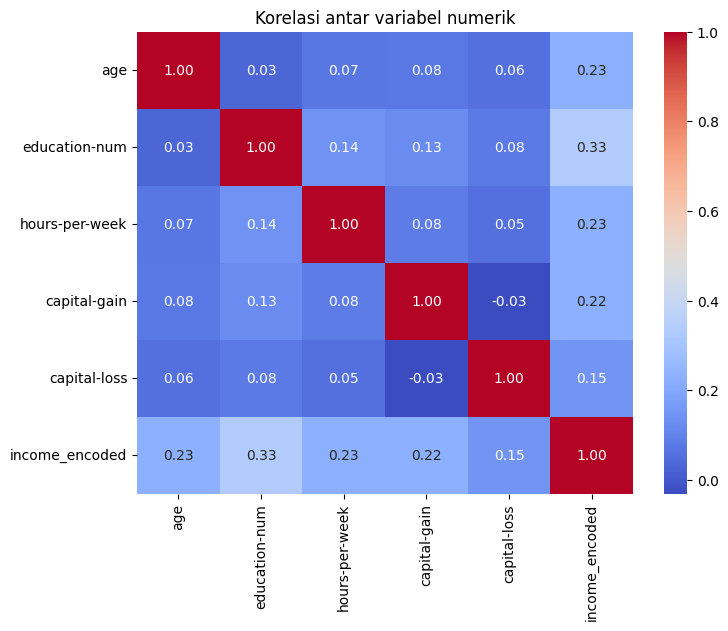


Pasangan variabel dengan korelasi lemah (|r| <= 0.5):
                     age  education-num  hours-per-week  capital-gain  \
age                  NaN       0.030940        0.071558      0.077229   
education-num   0.030940            NaN        0.143689      0.125146   
hours-per-week  0.071558       0.143689             NaN      0.082157   
capital-gain    0.077229       0.125146        0.082157           NaN   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income_encoded  0.230369       0.332613        0.227687      0.223013   

                capital-loss  income_encoded  
age                 0.056944        0.230369  
education-num       0.080972        0.332613  
hours-per-week      0.054467        0.227687  
capital-gain       -0.031441        0.223013  
capital-loss             NaN        0.147554  
income_encoded      0.147554             NaN  


In [ ]:
# Korelasi antar variabel numerik
corr_matrix = df[['age','education-num','hours-per-week','capital-gain','capital-loss','income_encoded']].corr()

# Tampilkan matriks korelasi
print(corr_matrix)

# Visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar variabel numerik")
plt.show()

# Identifikasi pasangan dengan korelasi lemah (<= |0.5|)
weak_corr = corr_matrix[(corr_matrix <= 0.5) & (corr_matrix >= -0.5)]
print("\nPasangan variabel dengan korelasi lemah (|r| <= 0.5):")
print(weak_corr)